In [3]:
import cv2
import sys
# print(sys.version)
 
print("Capturing video")
movie = cv2.VideoCapture("formwork.mp4")

print("Video captured")
 
opened = movie.isOpened

if not opened:
    print("Stream error")
    
while opened:
    ret, frame = movie.read()
    print(ret)
    cropped = frame[310:560, 300:655]  
    if ret == True:
        cropped = frame[305:571, 291:662]  
        print("gfd")
        cv2.imshow("Frame", frame)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    else:
        break
 
movie.release()
 
cv2.destroyAllWindows()

Capturing video
Video captured
True
gfd
True
gfd
True
gfd
True
gfd
True
gfd
True
gfd
True
gfd
True
gfd
False


TypeError: 'NoneType' object is not subscriptable

In [1]:
import cv2
import numpy as np
def writeOverImage(img,msg,value):
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, msg+':'+str(value), (10,650), font, 2, (0, 255, 100), 2, cv2.LINE_AA)
    return(img)

# Code to detect formwork progress and save the file

In [12]:
import cv2
import numpy as np
# input
Video_in = "data/formwork.mp4"

# output
Video_out = "output/formworkOut.mp4"

# Video Settings
winName = 'output'

#cv2.resizeWindow(winName, 500, 500)   #gives error if used here, must be used after creating a window using cv2.namedWindow

cap = cv2.VideoCapture(Video_in)

#Font to write over the image
font = cv2.FONT_HERSHEY_SIMPLEX

#Capture basic video meta data
fps = int(cap.get(cv2.CAP_PROP_FPS))
length_video = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(cap.get(3))
height = int(cap.get(4))

#To write o/p video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(Video_out, fourcc, fps, (width, height))

#Variables
n_frame = 0
frames = []
#dim = (500, 500)
#Input frame shape = (720, 1280)


while cap.isOpened():
    # get frame from video
    ret, frame = cap.read()
    print('video_progress: ', round(n_frame*100/length_video, 1), '%')
    
    # Do something
    #Verifying that the frame is there before applying any techniques, so the code is operational 
    #code is kept inside if loop to stop "NoneType' object is not subscriptable"

    if ret:
        #Crop the image to proces only the relevant part
        cropped = frame[310:560, 300:655]  
    
        #BGR range for Yellow color 
        YELLOW_MIN = np.array([50, 100, 170], np.uint8)
        YELLOW_MAX = np.array([130, 200, 255], np.uint8)
    
        #using in range to detect relevent pixels and count them
        dst = cv2.inRange(cropped, YELLOW_MIN, YELLOW_MAX)
        yellow_pixels = cv2.countNonZero(dst)
        

        #frame = writeOverImage(frame,"Yellow Color",yellow_pixels)    #Function call to write over frames [REMOVED]
        cv2.putText(frame,'Yellow Color:'+str(yellow_pixels), (10,650), font, 2, (0, 255, 100), 2, cv2.LINE_AA)      #write over frames 
        out.write(frame)                                                            #Save the video
        #cv2.imwrite('ConcreteImages/'+str(n_frame)+'.bmp', frame)                  #Save individual Images
        cv2.namedWindow(winName, cv2.WINDOW_NORMAL)                                 #Define the window
        #cv2.resizeWindow(winName, 500, 500)   #To resize window if needed
        cv2.imshow('output', frame)            #To display image if needed
        if cv2.waitKey(1) == ord('q'):
            break
    else:
        break
    n_frame += 1
    
#Releasing video and destroying all windows after use
cap.release()
out.release()
cv2.destroyAllWindows()

# To crop the image to area of interest

In [10]:
import cv2
image = cv2.imread("ConcreteImages/Formwork/Outputs/2.bmp")
cropped = image[310:560, 300:655]  
#cropped = image[280:600, 291:720]
#          image[y:y+h, x:x+w]
cv2.imshow("Image", cropped)
print(cropped.shape)
cv2.imwrite('ConcreteImages/Formwork/cropped2.bmp', cropped)
cv2.waitKey(200)
cv2.destroyAllWindows()

(250, 355, 3)


# Edge Detection with canny

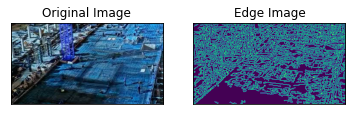

In [95]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv2.imread("ConcreteImages/Reinforcement/cropped2.bmp")
edges = cv.Canny(img,100,200)

plt.subplot(121),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges)
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [96]:
np.sum(edges)

4830210

In [2]:
import cv2
import numpy as np;

# Read image
im = cv2.imread("cropped2.bmp", cv2.IMREAD_GRAYSCALE)

# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector()

# Detect blobs.
keypoints = detector.detect(im)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show keypoints
cv2.imshow("Keypoints", im_with_keypoints)
cv2.waitKey(6000)
cv2.destroyAllWindows()

# Change the background color to reduce the edges

In [16]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt
img = cv2.imread("ConcreteImages/ConcreteCropped/cropped4.bmp")
print(img.shape)
img[np.all(img > 200, axis=2)] = 0
img[np.all(img < 60, axis=2)] = 0

cv2.imshow("ewttwert",img)
cv2.waitKey(10000)
cv2.destroyAllWindows()

(280, 384, 3)


# Trying with laplacian filters

In [87]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
src = cv.imread("ConcreteImages/Reinforcement/cropped4.bmp")


kernel = np.array([[1, 1, 1], [1, -7, 1], [1, 1, 1]], dtype=np.float32)
#trying gaussian blur
#cv.GaussianBlur(src, (3,3), cv.BORDER_DEFAULT);
imgLaplacian = cv.filter2D(src, cv.CV_32F, kernel)
#sharp = np.float32(src)
#imgResult = sharp - imgLaplacian
# convert back to 8bits gray scale
#imgResult = np.clip(imgResult, 0, 255)
#imgResult = imgResult.astype('uint8')
imgLaplacian = np.clip(imgLaplacian, 0, 255)
imgLaplacian = np.uint8(imgLaplacian)
#cv.imshow('Laplace Filtered Image', imgLaplacian)
cv.imshow('New Sharped Image', imgLaplacian)
cv.imwrite('ConcreteImages/Reinforcement/acropped4.bmp', imgLaplacian)

cv.waitKey(600)
cv.destroyAllWindows()

# contours

In [50]:
import cv2
import numpy as np

image=cv2.imread('ConcreteImages/ConcreteCropped/cropped4.bmp')

gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

edged=cv2.Canny(gray,30,200)    #100, 200

#use a copy of your image, e.g. - edged.copy(), since finding contours alter the image
#we have to add _, before the contours as an empty argument due to upgrade of the open cv version
contours,hierarchy=cv2.findContours(edged,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
cv2.imshow('canny edges after contouring', edged)
cv2.imwrite('ConcreteImages/ConcreteCropped/acropped_4.bmp', edged)
cv2.waitKey(10000)
cv2.destroyAllWindows()
#print(contours)
print('Numbers of contours found=' + str(len(contours)))


Numbers of contours found=572


In [59]:
image=cv2.imread('ConcreteImages/ConcreteCropped/cropped0.bmp')

image = cv2.pyrMeanShiftFiltering(image, 21, 51)

BROWN_MIN = np.array([100, 100, 60], np.uint8)
# maximum value of brown pixel in BGR order -> brown
BROWN_MAX = np.array([170, 200, 180], np.uint8)

dst = cv2.inRange(image, BROWN_MIN, BROWN_MAX)
no_brown = cv2.countNonZero(dst)
print('The number of yellow pixels is: ' + str(no_brown))

cv2.imshow('canny edges after contouring', image)
cv2.waitKey(300)
cv2.destroyAllWindows()

The number of yellow pixels is: 5274


In [ ]:
5274   17477    38494    36618  50047  

# Rotating image didn't help

# Yello color range 

In [5]:
import cv2
import numpy as np

img = cv2.imread("ConcreteImages/ConcreteCropped/cropped2.bmp")
# minimum value of brown pixel in BGR order -> burleywood
BROWN_MIN = np.array([110, 110, 90], np.uint8)
# maximum value of brown pixel in BGR order -> brown
BROWN_MAX = np.array([140, 160, 170], np.uint8)

dst = cv2.inRange(img, BROWN_MIN, BROWN_MAX)
no_brown = cv2.countNonZero(dst)
print('The number of yellow pixels is: ' + str(no_brown))
cv2.imshow("opencv",img)
cv2.waitKey(6000)
cv2.destroyAllWindows()

The number of yellow pixels is: 24166


In [40]:
import cv2
import numpy as np

img = cv2.imread("ConcreteImages/0.bmp")

cv2.rectangle(img,(310,560),(660,228),(0,255,0),3)
cv2.imshow("opencv",img)
cv2.waitKey(5000)
cv2.destroyAllWindows()

In [ ]:
11811   21623   37146    25601     31000

# Write over images

In [77]:
import cv2
import numpy as np
a=15

img = cv2.imread("ConcreteImages/Formwork/cropped0.bmp")
print(img.shape)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, 'Edges:'+str(a), (10,250), font, 1.25, (0, 255, 0), 2, cv2.LINE_AA)
cv2.imshow("opencv",img)
cv2.waitKey(5000)
cv2.destroyAllWindows()

(266, 371, 3)


In [2]:
def writeOverImage(img,msg,value):
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, msg+':'+str(value), (10,250), font, 1.25, (0, 255, 0), 2, cv2.LINE_AA)
    return(img)

In [84]:
img = cv2.imread("ConcreteImages/Formwork/cropped0.bmp")
image=writeOverImage(img,"wse","efs")
cv2.imshow("opencv",image)
cv2.waitKey(5000)
cv2.destroyAllWindows()

error: OpenCV(4.5.2) ../modules/highgui/src/window.cpp:404: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


# To find the concreting progress

In [71]:
import cv2
import numpy as np
# input
Video_in = "data/concreting.mp4"

# output
Video_out = "output/concretingOut.mp4"

# Video Settings
winName = 'output'

#cv2.resizeWindow(winName, 500, 500)   #gives error if used here, must be used after creating a window using cv2.namedWindow

cap = cv2.VideoCapture(Video_in)

#Font to write over the image
font = cv2.FONT_HERSHEY_SIMPLEX

#Capture basic video meta data
fps = int(cap.get(cv2.CAP_PROP_FPS))
length_video = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(cap.get(3))
height = int(cap.get(4))

#To write o/p video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(Video_out, fourcc, fps, (width, height))

#Variables
n_frame = 0
frames = []
#dim = (500, 500)
#Input frame shape = (720, 1280)


while cap.isOpened():
    # get frame from video
    ret, frame = cap.read()
    print('video_progress: ', round(n_frame*100/length_video, 1), '%')
    
    # Do something
    #Verifying that the frame is there before applying any techniques, so the code is operational 
    #code is kept inside if loop to stop "NoneType' object is not subscriptable"

    if ret:
        #Crop the image to proces only the relevant part
        cropped = frame[310:500, 300:655]  

        #Using Pyramid Mean Shift Filter which is used before segmentation, it improves the pixel count by reducing the shadows from crane for 3rd and 4th frame
        image = cv2.pyrMeanShiftFiltering(cropped, 21, 51)
        
        #BGR range for Yellow color 
        Grey_MIN = np.array([100, 100, 60], np.uint8)
        Grey_MAX = np.array([170, 200, 180], np.uint8)
    
        #using in range to detect relevent colored pixels and count them
        dst = cv2.inRange(cropped, Grey_MIN, Grey_MAX)
        Grey_pixels = cv2.countNonZero(dst)
    
        #Function call to write the value of number of pixels over the image [REMOVED]
        #frame = writeOverImage(frame,"Yellow Color",Grey_pixels)
        cv2.putText(frame,'Yellow Color:'+str(Grey_pixels), (10,650), font, 2, (0, 255, 100), 2, cv2.LINE_AA)     #write over frames 
        out.write(frame)                                                            #Save the video
        #cv2.imwrite('ConcreteImages/'+str(n_frame)+'.bmp', frame)                  #Save individual Images
        cv2.namedWindow(winName, cv2.WINDOW_NORMAL)                                 #Define the window
        #cv2.resizeWindow(winName, 500, 500)   #To resize window if needed
        cv2.imshow('output', frame)            #To display image if needed
        if cv2.waitKey(1) == ord('q'):
            break
    else:
        break
    n_frame += 1

#Releasing video and destroying all windows after use
cap.release()
out.release()
cv2.destroyAllWindows()

video_progress:  0.0 %
video_progress:  20.0 %
video_progress:  40.0 %
video_progress:  60.0 %
video_progress:  80.0 %
video_progress:  100.0 %


# Removing shaodows

In [70]:
import cv2
import numpy as np

img = cv2.imread("ConcreteImages/ConcreteCropped/cropped1.bmp")

rgb_planes = cv2.split(img)

result_planes = []
result_norm_planes = []
for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((11,11), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 21)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)

result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)
cv2.imshow("opencv",result)
cv2.waitKey(9000)
cv2.destroyAllWindows()
#cv2.imwrite('ConcreteImages/Reinforcement/acropped4.png', result)
#cv2.imwrite('shadows_out_norm.png', result_norm)

In [2]:
import cv2
import numpy as np
# input
Video_in = "data/concreting.mp4"

# output
Video_out = "output/XY.mp4"

# Video Settings
winName = 'output'

#cv2.resizeWindow(winName, 500, 500)   #gives error if used here, must be used after creating 
#a window using cv2.namedWindow

cap = cv2.VideoCapture(Video_in)  #Capturing video from file

#Font to write over the video frames
font = cv2.FONT_HERSHEY_SIMPLEX

#Basic video meta data
fps = int(cap.get(cv2.CAP_PROP_FPS))
length_video = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(cap.get(3))
height = int(cap.get(4))

#To write o/p video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(Video_out, fourcc, fps, (width, height))

#variables
n_frame = 0                #Frame number
frames = []                #list to hold the frame
#grey_pixels = []           #List to save the pixel values to create a progress bar

opened = cap.isOpened

if not opened:
    print("Stream error")

while opened():
    # get frame from video
    ret, frame = cap.read()
    print('video_progress: ', round(n_frame*100/length_video, 1), '%')
    
    # Do something

    if ret:
        #Crop the image to proces only the relevant part
        cropped = frame[310:500, 300:655]  
        
        #Applying pyramidMeanShitFilter 
        image = cv2.pyrMeanShiftFiltering(cropped, 21, 51)
        
        #BGR range for Yellow color 
        Grey_MIN = np.array([100, 100, 60], np.uint8)
        Grey_MAX = np.array([170, 200, 180], np.uint8)
    
        #using in range to detect relevent pixels and count them
        dst = cv2.inRange(cropped, Grey_MIN, Grey_MAX)
        pixels = cv2.countNonZero(dst)
        grey_pixels.append(pixels)
        
        #Write the value of number of pixels over the image
        cv2.putText(frame,'Yellow Color:'+str(pixels), (10,650), font, 2, (0, 255, 100), 2, cv2.LINE_AA)
        out.write(frame)
        cv2.imwrite('ConcreteImages/'+str(n_frame)+'.bmp', frame)
        cv2.namedWindow(winName, cv2.WINDOW_NORMAL)
        #cv2.resizeWindow(winName, 500, 500)
        cv2.imshow('output', frame)
        if cv2.waitKey(1) == ord('q'):
            break
    else:
        break
    n_frame += 1

#Releasing video and destroying all windows after use
cap.release()
out.release()
cv2.destroyAllWindows()

In [81]:
max_pixels = max(grey_pixels)
min_pixels = min(grey_pixels)

grey_pixels[0]

42154
9245
